# Homework

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline

In [18]:
data = pd.read_csv('bank-full.csv', sep=';')
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In this dataset the target variable is y variable - has the client subscribed a term deposit or not.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
features = ["age", "job", "marital", "education", "balance", "housing", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]

In [13]:
len(features)

15

In [9]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [17]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician
marital,married,single,married,married,single,married,single,divorced,married,single
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5,5,5,5,5,5
month,may,may,may,may,may,may,may,may,may,may
duration,261,151,76,92,198,139,217,380,50,55


In [25]:
data = data[features]

In [14]:
data.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [15]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
data.y = (data.y == 'yes').astype(int)
data.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [20]:
# splitting the dataset
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test.y

del df_train['y']
del df_val['y']
del df_test['y']

In [22]:
len(data)

45211

In [21]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [29]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [30]:
# CALCULATING ROC AUC SCORE:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

      age, 0.512
  balance, 0.589
      day, 0.526
 duration, 0.815
 campaign, 0.571
    pdays, 0.590
 previous, 0.599


> Answer for question 1: **duration**

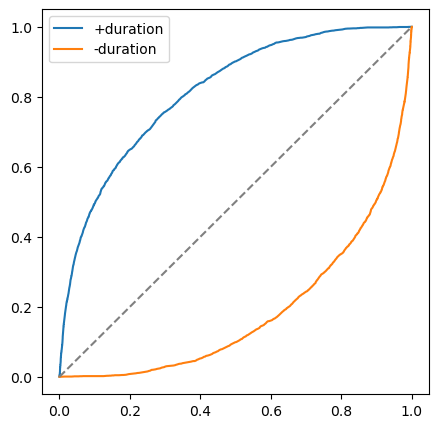

In [34]:
# plotting the ROC Curve
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.duration)
plt.plot(fpr, tpr, label='+duration')

fpr, tpr, _ = roc_curve(y_train, -df_train.duration)
plt.plot(fpr, tpr, label='-duration')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

### Training the model

In [35]:
#training the logistic regression model
columns = categorical + numerical

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [47]:
# inspect the roc auc score
roc_auc_score(y_val, y_pred)

0.8999780109216243

> Answer for question 2 : **0.89**

In [48]:
# inspect the roc auc score
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.6558852541561422

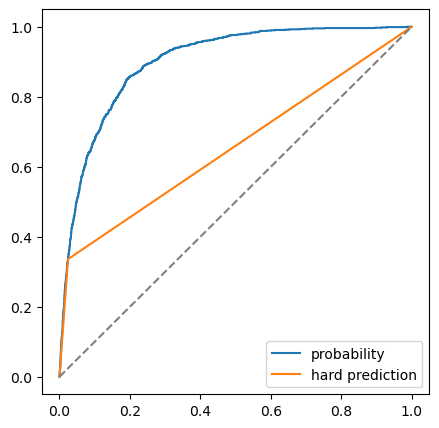

In [49]:
# inspecting the roc curve
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr, label='probability')

fpr, tpr, _ = roc_curve(y_val, y_pred_bin)
plt.plot(fpr, tpr, label='hard prediction')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [50]:
# creatting a confusion matrix
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores


# implementation of the function
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,1098,7944,0,0
10,0.1,927,1501,171,6443
20,0.2,710,702,388,7242
30,0.3,568,425,530,7519
40,0.4,467,277,631,7667
50,0.5,369,193,729,7751
60,0.6,292,135,806,7809
70,0.7,226,106,872,7838
80,0.8,148,68,950,7876
90,0.9,74,30,1024,7914


In [51]:
# adding the columns
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

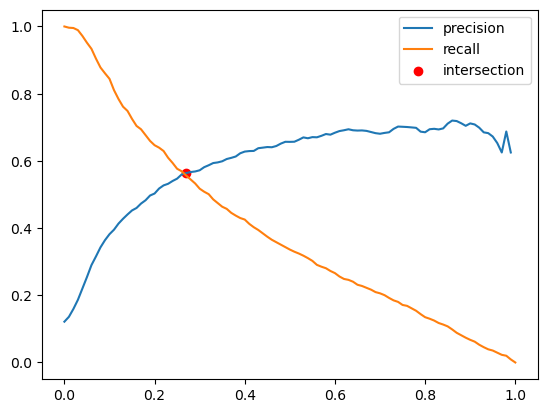

Intersection occurs at threshold: 0.27
Precision: 0.5636531365313653, Recall: 0.5564663023679417


In [53]:
# inspecting the curves and getting the intersection point

# Calculate the absolute difference between precision and recall
df_scores['diff'] = np.abs(df_scores['p'] - df_scores['r'])

# Find the index of the minimum difference (closest intersection)
min_diff_index = df_scores['diff'].idxmin()

# Get the corresponding threshold, precision, and recall at this index
intersection_threshold = df_scores.loc[min_diff_index, 'threshold']
intersection_precision = df_scores.loc[min_diff_index, 'p']
intersection_recall = df_scores.loc[min_diff_index, 'r']

# Plot the curves
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

# Plot the intersection point
plt.scatter(intersection_threshold, intersection_precision, color='red', label='intersection')

# Add legend and show the plot
plt.legend()
plt.show()

# Print the intersection details
print(f"Intersection occurs at threshold: {intersection_threshold}")
print(f"Precision: {intersection_precision}, Recall: {intersection_recall}")

> the answer in the question 3 : **0.265**

In [54]:
# getting the F1 scores:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

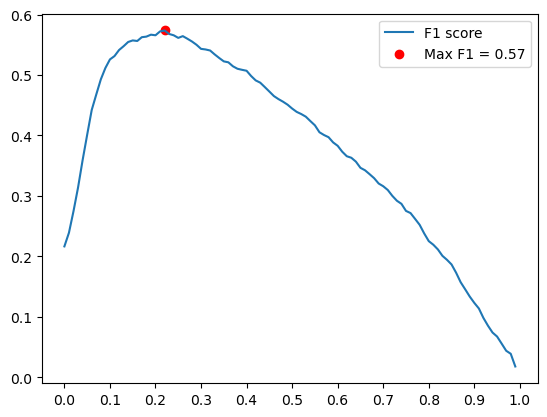

Maximum F1 score: 0.5736820257368203 at threshold: 0.22


In [57]:
#inspecting the f1 scores

# Find the index of the maximum F1 score
max_f1_index = df_scores['f1'].idxmax()

# Get the corresponding threshold and F1 score at this index
max_f1_threshold = df_scores.loc[max_f1_index, 'threshold']
max_f1_value = df_scores.loc[max_f1_index, 'f1']

# Plot the F1 score curve
plt.plot(df_scores.threshold, df_scores.f1, label='F1 score')

# Highlight the maximum F1 score point
plt.scatter(max_f1_threshold, max_f1_value, color='red', label=f'Max F1 = {max_f1_value:.2f}')

# Set x-axis ticks and show plot
plt.xticks(np.linspace(0, 1, 11))
plt.legend()
plt.show()

# Print the maximum F1 score details
print(f"Maximum F1 score: {max_f1_value} at threshold: {max_f1_threshold}")


> the answer in the question 4 : **0.22**

In [58]:
# defining train and predict function
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [60]:
# initializing the kfold cross validation

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y
    y_val = df_val.y

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


> the answer in the question 5 : **0.006**

In [61]:
# inspecting kfold cross validation

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for c in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y
        y_val = df_val.y

        dv, model = train(df_train, y_train, C=c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (c, np.mean(scores), np.std(scores)))

C=1e-06, 0.701 +- 0.009
C=0.001, 0.861 +- 0.007
C=   1, 0.906 +- 0.006


> the answer in the question 6 : **1**